# Title: AIDI 1002 Final Term Project Report

1. Bhanu Bhakta Bhattarai (200566953)
2. Purviben patel (200522745)

# Introduction:

#### Problem Description:

In my project, the primary goal is to predict the prices of two stocks Amazon,and General Electric (GE). I utilize a variant of Recurrent Neural Network (RNN) known as Bidirectional Long Short-Term Memory (BiLSTM) for the forecasting model. For both Amazon and GS, I employ its historical data as the only feature. I evaluate the performance of the BiLSTM model against other models such as ARIMA and LSTM. One of the practical challenges I address in my project is the use of BiLSTM for stock price forecasting, particularly a recurring delay in forecast, which I term as ‘forecasting lag’.

#### Context of the Problem:

This project is important because it can change the way we make financial decisions. Predicting stock prices is a big part of investment strategies, managing portfolios, and assessing risks. If we can predict stock prices accurately, it can help investors make better decisions and potentially earn more money.

We’re using advanced machine learning techniques, like Bidirectional Long Short-Term Memory (BiLSTM), to do this. Unlike traditional models, BiLSTM can understand complex patterns and relationships in data over time, which is really important for unpredictable areas like stock markets.

So, this project is not just important for finance, but also for advancing the use of machine learning in real-world situations. It’s a step towards creating more advanced, reliable, and efficient prediction models in finance.

#### Limitation About other Approaches:

Long Short-Term Memory (LSTM) models have been widely used for stock price forecasting due to their ability to capture long-term dependencies in time series data. However, they do have several limitations:

Look-ahead bias: This occurs when the model relies on information that was not currently available, which gives better than expected results due to the future information it already possesses.

Noise and uncertainty: The accuracy of using time series model alone is questioned due to the uncertainty and high noise characteristics of financial time series.

Overfitting: LSTM models can easily overfit to the training data, reducing their ability to generalize to unseen data.

#### Solution:

Bidirectional LSTM (Bi-LSTM) can help mitigate some of the limitations of standard LSTM models in stock price forecasting:

Better handling of sequences: Bi-LSTM processes the data in both forward and backward directions. This allows the model to have information about future and past states simultaneously, which can be beneficial in understanding the context better and making more accurate predictions.

Reduced overfitting: Overfitting is a common problem in LSTM where the model performs well on the training data but poorly on unseen data. Bi-LSTM can help reduce overfitting by learning the input data in two ways, thus capturing patterns that a unidirectional LSTM might miss.

Improved model performance: By processing the data in both directions, Bi-LSTM can capture patterns and dependencies in the data that might be missed by a unidirectional LSTM. This can lead to improved model performance.


# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| https://cs230.stanford.edu/projects_winter_2021/reports/70667451.pdf | Stock Market Prediction using CNN and LSTM| Jane Street Market | only 0.40 Accuracy
| https://arxiv.org/pdf/2010.06417.pdf| https://arxiv.org/pdf/2010.06417.pdf | GitHub | High Accuracy but can be imporved


# Methodology
Existing paper methodology:
Model Structure: Utilized LSTM architecture for time series forecasting.
Input Shape: 3D array comprising batch-size, time-step, and input-dimension.
Time-step and Batches: Defined time-step as the number of days considered in the model's window. Used mini-batches for efficient processing.
Data Preparation: Reshaped input data into samples with input/output patterns.
Train-Test Split: Divided data into 80% training and 20% testing sets.
Hyperparameter Selection: Tuned hyperparameters such as the number of layers, neurons, learning rate, epochs, batch-size, and time-step.

Training and Evaluation:
Loss Function: Minimized mean squared error (MSE) during training.
Validation and Early Stopping: Monitored training and validation errors. Applied early stopping to prevent excessive epochs without validation error reduction.
Optimization Algorithms: Employed Stochastic Gradient Descent and RMSProp for weight updates.
Performance Evaluation: Utilized R2 score to measure the discrepancy between predictions and test data.

Hyperparameters:

Data - Closing Price
Layers - 4
Neurons  - 60
Learning Rate - 0.0001
Epochs	- 300
Batch-size - 16
Time-step - 60

Our Contribution:
In the context of existing research on stock forecasting using LSTM, my contribution has been to enhance the performance of the model through hyperparameter optimization and the use of a Bidirectional LSTM architecture.

Firstly, we employed a Bidirectional LSTM model, which trains two LSTMs on the input sequence - one on the input sequence as it is, and the other on a reversed copy of the input sequence. This approach provides additional context to the network and can result in faster and more comprehensive learning on the problem.

Secondly, we optimized the batch size for training the Bidirectional LSTM model. The batch size, which is the number of samples processed before the model is updated, was set to 16. The optimal batch size can vary depending on the specific dataset and problem, and finding the right batch size is crucial for the model’s performance.

Through hyperparameter tuning, I was able to find the optimal set of parameters that resulted in better performance of the model. Hyperparameter tuning is a critical step in building effective machine learning models, as the choice of hyperparameters can significantly influence the model’s predictive accuracy.


# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

# Imports

In [1]:
!pip install utils
!pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [2]:
# Standard library imports
import os
import sys
import time
import io
import datetime
import math
import warnings
import logging
warnings.filterwarnings("ignore")

# Third party imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from tqdm._tqdm_notebook import tqdm_notebook
import pickle
from keras.models import Sequential,save_model, load_model
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import optimizers
import plotly.graph_objects as go
from google.colab import files

# MXNet related imports
from mxnet import nd, autograd, gluon, context
from mxnet.gluon import nn, rnn
import mxnet as mx
mx.random.seed(1719)

# TensorFlow logging settings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# Other settings
context = mx.cpu()
model_ctx = mx.cpu()
time.tzset()

# Enable inline plotting for matplotlib
%matplotlib inline

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger("tensorflow").setLevel(logging.ERROR)
os.environ['TZ'] = 'Asia/Tehran'  # to set timezone; needed when running on cloud
time.tzset()


# Data Import and Preparation

In [3]:
df_gs = pd.read_csv('https://raw.githubusercontent.com/berserkhmdvhb/stockdata-public/master/ge.us.txt')
df_gs.drop(df_gs.columns[[1,2,3,5,6]], axis=1,inplace=True)
df_gs.columns = ['Date','GS']
df_gs['Date'] = pd.to_datetime(df_gs['Date'], format='%Y-%m-%d')
df_gs.head()

,Date,GS
0,1962-01-02,0.6201
1,1962-01-03,0.6201
2,1962-01-04,0.6122
3,1962-01-05,0.5957
4,1962-01-08,0.5957


In [4]:
df_gs.isnull().sum()

Date    0
GS      0
dtype: int64

In [5]:
df_gs.describe()

,GS
count,14058.000000
mean,10.534161
std,11.743726
min,0.459020
25%,0.901500
50%,3.884800
75%,21.370000
max,48.056000


# Data Visualization

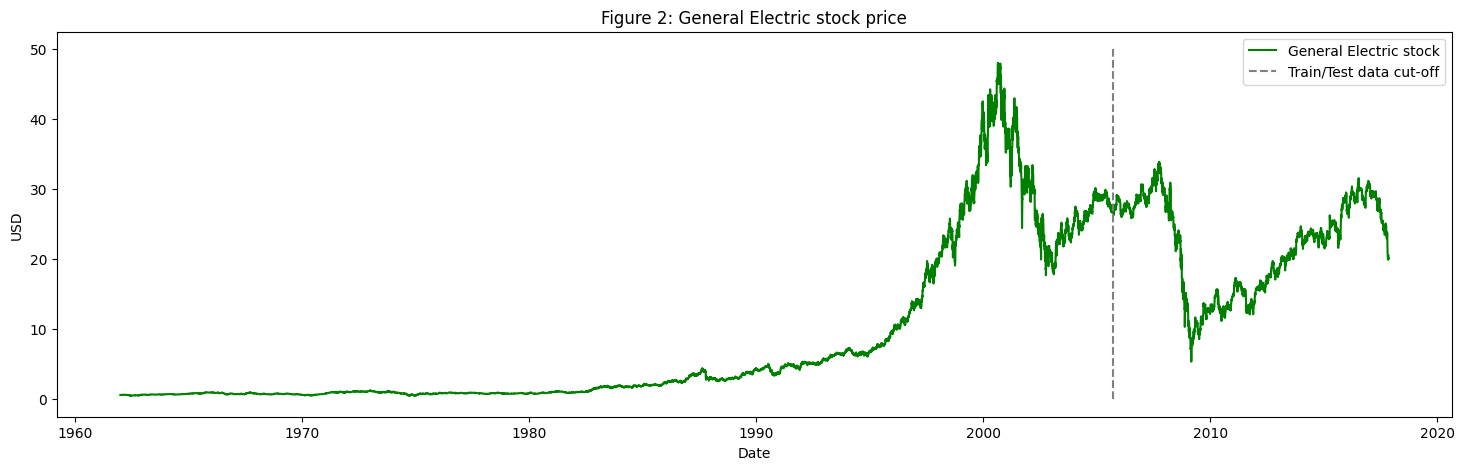

In [6]:

###Visaulise 400 days
def plot_stocks(dataset1):
    plt.figure(figsize=(18, 5), dpi=100)
    shape_0 = dataset1.shape[0]

    plt.plot(dataset1['Date'],dataset1.iloc[:, 1],color = 'g', label='General Electric stock')
    plt.vlines(datetime.date(2005,9,21), 0, 50, linestyles='--', colors='gray', label='Train/Test data cut-off')
    plt.xlabel('Date')
    plt.ylabel('USD')
    plt.title('Figure 2: General Electric stock price')
    plt.legend()
    plt.show()

plot_stocks(df_gs)

In [7]:
## ma: Moving Average
## MACD: Moving Average Convergence Divergence
## ema: Exponential Moving Average

def get_technical_indicators(dataset):
    # Create a copy of the input dataset
    ndataset = dataset[['Date', 'GS']].copy()
    ndataset.rename(columns={'GS': 'Adj'}, inplace=True)

    # Create 7 and 21 days Moving Average
    ndataset['ma7'] = ndataset['Adj'].rolling(window=7).mean()
    ndataset['ma21'] = ndataset['Adj'].rolling(window=21).mean()

    # Create MACD
    ndataset['12ema'] = ndataset['Adj'].ewm(span=12, adjust=False).mean()
    ndataset['26ema'] = ndataset['Adj'].ewm(span=26, adjust=False).mean()

    # Create Bollinger Bands
    ndataset['20sd'] = ndataset['Adj'].rolling(window=20).std()
    ndataset['upper_band'] = ndataset['ma21'] + (ndataset['20sd'] * 2)
    ndataset['lower_band'] = ndataset['ma21'] - (ndataset['20sd'] * 2)

    # Create Exponential moving average
    ndataset['ema'] = ndataset['Adj'].ewm(com=0.5).mean()

    # Fill Missing Values
    fill_list = ['ma7', 'ma21', '20sd', 'upper_band', 'lower_band']
    for col in fill_list:
        ndataset[col].fillna(ndataset[col].mean(), inplace=True)

    return ndataset

dataset_TI_gs = get_technical_indicators(df_gs)
dataset_TI_gs.head()

,Date,Adj,ma7,ma21,12ema,26ema,20sd,upper_band,lower_band,ema
0,1962-01-02,0.6201,10.534214,10.534029,0.620100,0.620100,0.268396,11.070858,9.9972,0.620100
1,1962-01-03,0.6201,10.534214,10.534029,0.620100,0.620100,0.268396,11.070858,9.9972,0.620100
2,1962-01-04,0.6122,10.534214,10.534029,0.618885,0.619515,0.268396,11.070858,9.9972,0.614631
3,1962-01-05,0.5957,10.534214,10.534029,0.615318,0.617751,0.268396,11.070858,9.9972,0.601853
4,1962-01-08,0.5957,10.534214,10.534029,0.612300,0.616117,0.268396,11.070858,9.9972,0.597734


In [8]:
def plot_technical_indicators(dataset, last_days):
    dataset = dataset.iloc[-last_days:, :]
    x_ = list(dataset.index)

    plt.figure(figsize=(16, 10), dpi=100)
    plt.plot(dataset['ma7'], label='MA 7', color='g', linestyle='--')
    plt.plot(dataset.iloc[:, 1], label='Closing Price', color='b')
    plt.plot(dataset['ma21'], label='MA 21', color='r', linestyle='--')
    plt.plot(dataset['upper_band'], label='Upper Band', color='c')
    plt.plot(dataset['lower_band'], label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title(f'Technical indicators for Goldman Sachs - last {last_days} days.')
    plt.ylabel('USD')
    plt.legend()
    plt.savefig("inds.png")
    plt.show()

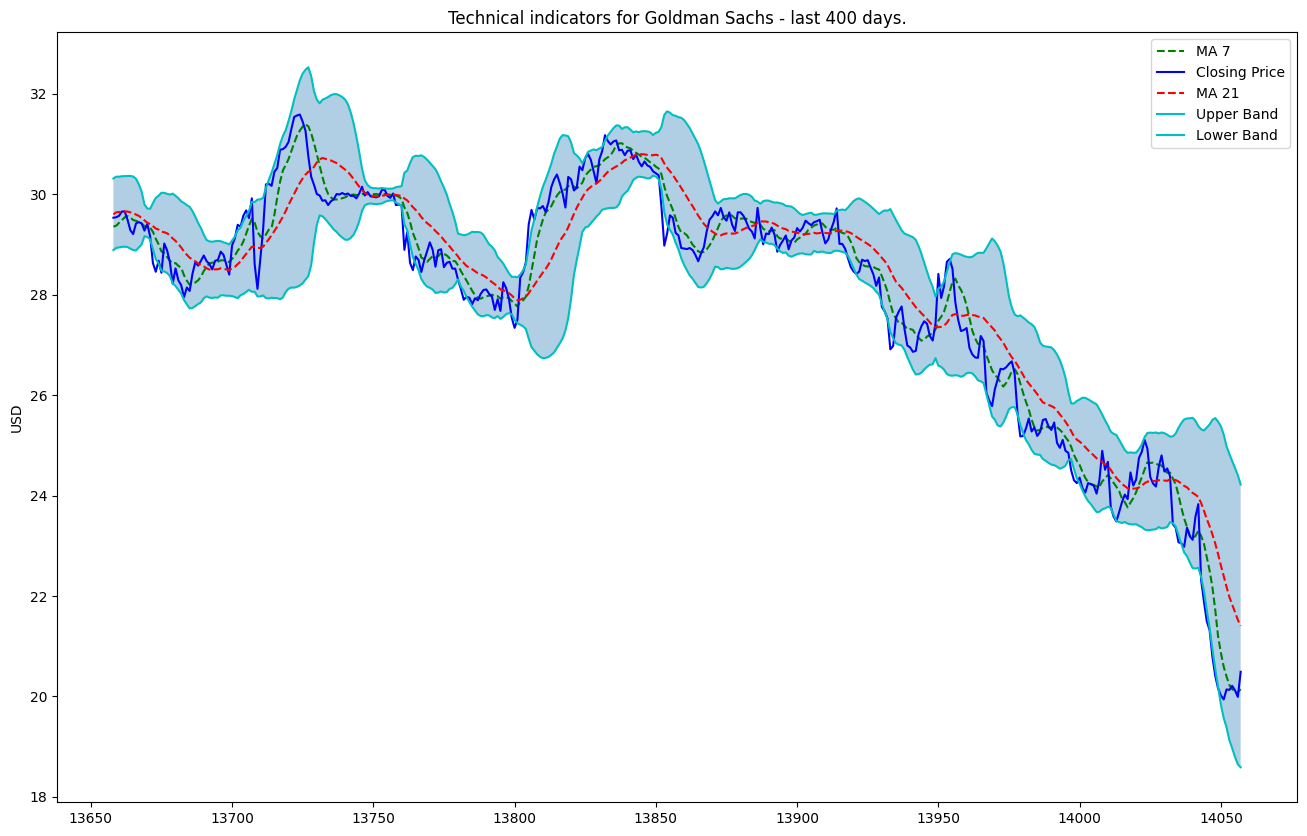

In [9]:
plot_technical_indicators(dataset_TI_gs, 400)

# Data Preparation

In [10]:
def fourier_transform(dataset):
    close_fft = np.fft.fft(np.asarray(dataset.iloc[:, 1].tolist()))
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    return fft_df

def fourier_tr(fft_df, num_):
    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    return np.fft.ifft(fft_list_m10)

def plot_fouriers(dataset, n1, n2, n3, n4):
    fft_df = fourier_transform(dataset)
    plt.figure(figsize=(18, 5), dpi=100)
    for num_ in [n1, n2, n3, n4]:
        plt.plot(fourier_tr(fft_df, num_), label='Fourier transform with {} components'.format(num_))
    plt.plot(dataset.iloc[:, 1],  label='Real')
    plt.xlabel('Days')
    plt.ylabel('USD')
    plt.title('Figure 3: Goldman Sachs (close) stock prices & Fourier transforms')
    plt.legend()
    plt.savefig("four.png")
    plt.show()



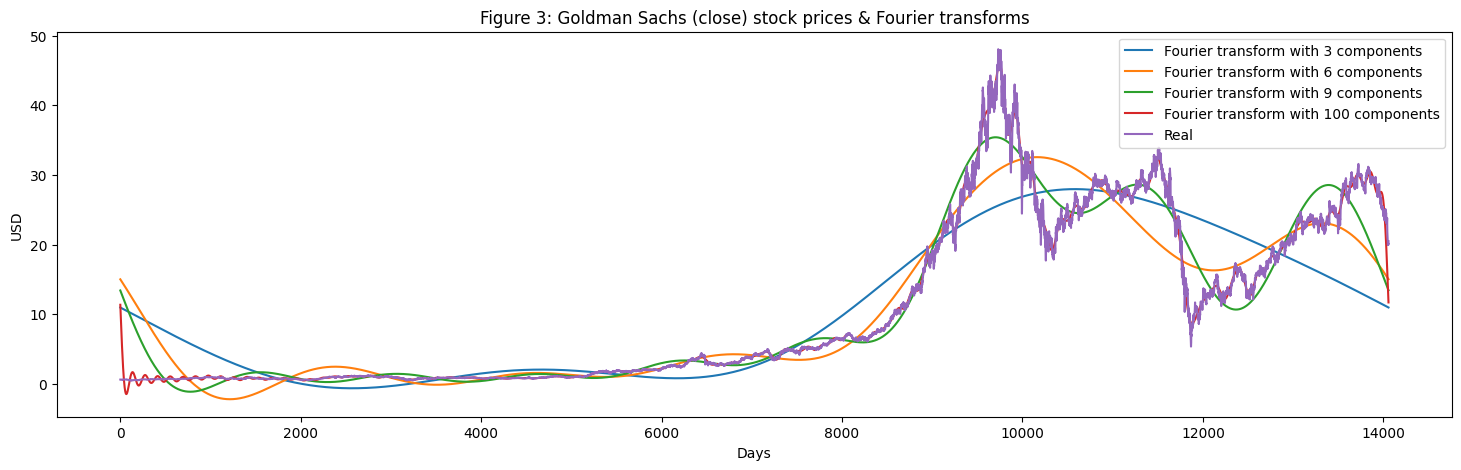

In [11]:
plot_fouriers(df_gs,3, 6, 9, 100)

# Feature Engineering

In [12]:
dataset_total = dataset_TI_gs.copy()
print('Total dataset has {} samples, and {} features.'.format(dataset_total.shape[0], dataset_total.shape[1]))
dataset_total.set_index('Date', inplace=True)


Total dataset has 14058 samples, and 10 features.


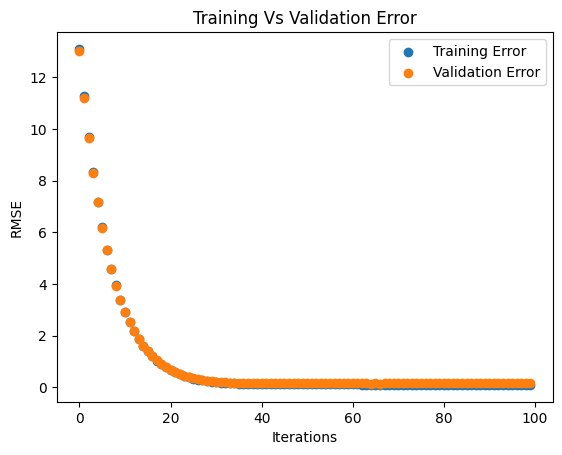

In [13]:
def train_model(data, test_size=0.35, random_state=42):
    # Split the data
    X = data.iloc[:, 1:]
    y = data['Adj']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define the model parameters
    params = {
        'gamma': 0.0,
        'n_estimators': 100,
        'base_score': 0.9,
        'colsample_bytree': 1,
        'learning_rate': 0.14
    }

    # Train the model
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

    return model, X_train, X_test

# Call the function to train the model
model, X_train, X_test = train_model(dataset_total)

# Plot the training vs validation error
eval_result = model.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds, y=eval_result['validation_0']['rmse'], label='Training Error')
plt.scatter(x=training_rounds, y=eval_result['validation_1']['rmse'], label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()


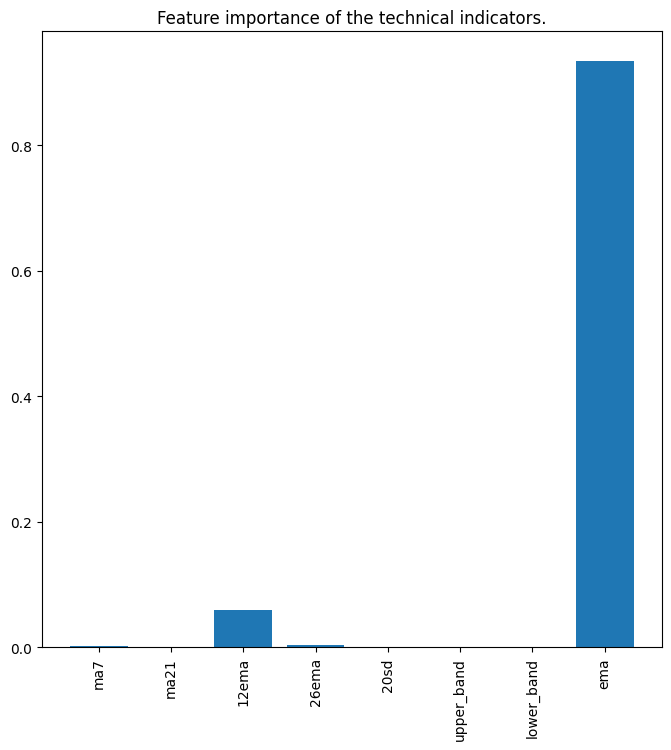

In [14]:

# Plot the feature importance
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(model.feature_importances_))], model.feature_importances_.tolist(), tick_label=X_test.columns)
plt.title('Feature importance of the technical indicators.')
plt.show()


In [15]:
len(dataset_total.columns)

9

# Bidirectional LSTM

In [16]:
# Define hyperparameters
params = {
    "batch_size": 16,
    "epochs": 300,
    "lr": 0.000010000,
    "time_steps": 60
}

iter_changes = "dropout_layers_0.4_0.4"
# Define output path
OUTPUT_PATH = 'drive/MLProject' + iter_changes
TIME_STEPS = params["time_steps"]
BATCH_SIZE = params["batch_size"]


# Create output directory if it doesn't exist
if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)
    print("Directory created", OUTPUT_PATH)

# Function to trim dataset based on batch size
def trim_dataset(mat, batch_size):
    no_of_rows_drop = mat.shape[0] % batch_size
    if no_of_rows_drop > 0:
        return mat[:-no_of_rows_drop]
    else:
        return mat

# Function to build timeseries
def build_timeseries(mat, y_col_index):
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    return x, y

# Select features
features = [i for i in range(9)]

# Split the data
df_train, df_test = train_test_split(dataset_total.iloc[:, features], train_size=0.8, test_size=0.2, shuffle=False)

# Scale the features
scaler = MinMaxScaler()
x_train = scaler.fit_transform(df_train.values)
x_test = scaler.transform(df_test.values)

# Build timeseries
x_t, y_t = build_timeseries(x_train, 0)
x_temp, y_temp = build_timeseries(x_test, 0)

# Trim the dataset to a size that's divisible by BATCH_SIZE
x_t = trim_dataset(x_t, params["batch_size"])
y_t = trim_dataset(y_t, params["batch_size"])
x_temp = trim_dataset(x_temp, params["batch_size"])
y_temp = trim_dataset(y_temp, params["batch_size"])

# Split the test data into validation and test sets
x_val, x_test_t = np.split(x_temp, 2)
y_val, y_test_t = np.split(y_temp, 2)

Directory created drive/MLProjectdropout_layers_0.4_0.4


  0%|          | 0/11186 [00:00<?, ?it/s]

  0%|          | 0/2752 [00:00<?, ?it/s]

In [17]:
from keras.layers import Bidirectional
def create_model(input_shape, learning_rate):
    model = Sequential()
    model.add(Bidirectional(LSTM(100, dropout=0.0, recurrent_dropout=0.0, stateful=True, return_sequences=True,
                                 kernel_initializer='random_uniform'), batch_input_shape=input_shape))
    model.add(Dropout(0.4))
    model.add(Bidirectional(LSTM(60, dropout=0.0)))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


model = None
try:
    model = pickle.load(open("lstm_model", 'rb'))
    print("Loaded saved model...")
except FileNotFoundError:
    print("Model not found")


# Define a function to split the data
def split_data(x_temp, y_temp, batch_size):
    x_val, x_test_t = np.split(trim_dataset(x_temp, batch_size), 2)
    y_val, y_test_t = np.split(trim_dataset(y_temp, batch_size), 2)
    return x_val, x_test_t, y_val, y_test_t

# Split the data
x_val, x_test_t, y_val, y_test_t = split_data(x_temp, y_temp, params["batch_size"])

# Create the model if it doesn't exist
if model is None:
    print("Building model...")
    model = create_model((params["batch_size"], params["time_steps"], x_t.shape[2]), params["lr"])

# Define the callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40, min_delta=0.0001)
print(os.path.join(OUTPUT_PATH, "best_model.h5"))
mcp = ModelCheckpoint(os.path.join(OUTPUT_PATH, "best_model.h5"), monitor='val_loss', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='min', period=1)

r_lr_plat = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=30, verbose=0, mode='auto',
                              min_delta=0.0001, cooldown=0, min_lr=0)

csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'training_log_' + time.ctime().replace(" ","_") + '.log'), append=True)

Model not found
Building model...
drive/MLProjectdropout_layers_0.4_0.4/best_model.h5


In [18]:
history = model.fit(x_t, y_t, epochs=params["epochs"], verbose=2, batch_size=BATCH_SIZE,
                    shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
                    trim_dataset(y_val, BATCH_SIZE)), callbacks=[es, mcp, csv_logger])

print("saving model...")
pickle.dump(model, open("lstm_model", "wb"))


Epoch 1/300

Epoch 1: val_loss improved from inf to 0.03160, saving model to drive/MLProjectdropout_layers_0.4_0.4/best_model.h5
699/699 - 27s - loss: 0.1646 - val_loss: 0.0316 - 27s/epoch - 39ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 0.03160
699/699 - 9s - loss: 0.1343 - val_loss: 0.0432 - 9s/epoch - 13ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 0.03160
699/699 - 10s - loss: 0.0755 - val_loss: 0.0441 - 10s/epoch - 15ms/step
Epoch 4/300

Epoch 4: val_loss improved from 0.03160 to 0.00552, saving model to drive/MLProjectdropout_layers_0.4_0.4/best_model.h5
699/699 - 9s - loss: 0.0353 - val_loss: 0.0055 - 9s/epoch - 12ms/step
Epoch 5/300

Epoch 5: val_loss improved from 0.00552 to 0.00504, saving model to drive/MLProjectdropout_layers_0.4_0.4/best_model.h5
699/699 - 9s - loss: 0.0073 - val_loss: 0.0050 - 9s/epoch - 13ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 0.00504
699/699 - 9s - loss: 0.0036 - val_loss: 0.0113 - 9s/epoch - 14ms/step
E

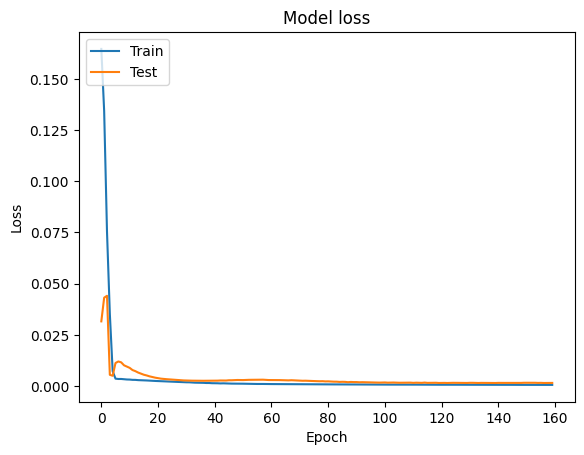

In [19]:
# Visualize the training data
from matplotlib import pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('train-val-loss.png')
plt.show()


In [20]:
saved_model = load_model(os.path.join(OUTPUT_PATH, 'best_model.h5'))
print(saved_model)

y_pred = saved_model.predict(trim_dataset(x_test_t, BATCH_SIZE), batch_size=BATCH_SIZE)
y_pred = y_pred.flatten()
y_test_t = trim_dataset(y_test_t, BATCH_SIZE)
error = mean_squared_error(y_test_t, y_pred)
print("Error is", error, y_pred.shape, y_test_t.shape)
r2score = r2_score(y_test_t, y_pred)
print("R2 is", r2score, y_pred.shape, y_test_t.shape)
print(y_pred[0:15])
print(y_test_t[0:15])
y_pred_org = (y_pred * scaler.data_range_[0]) + scaler.data_min_[0] # min_max_scaler.inverse_transform(y_pred)
y_test_t_org = (y_test_t * scaler.data_range_[0]) + scaler.data_min_[0] # min_max_scaler.inverse_transform(y_test_t)
print(y_pred_org[0:15])
print(y_test_t_org[0:15])

86/86 [==============================] - 2s 6ms/step
Error is 0.0005026234028610332 (1376,) (1376,)
R2 is 0.9246910032469392 (1376,) (1376,)
[0.38289034 0.3829864  0.3831964  0.3834499  0.38378415 0.38404432
 0.3842157  0.3843417  0.38449168 0.3845921  0.38468122 0.3846932
 0.38473693 0.38478822 0.38494933]
[0.32943225 0.33205846 0.32659593 0.32747834 0.31770881 0.31092267
 0.31258244 0.32378063 0.32592362 0.32947426 0.32783551 0.33443256
 0.33249967 0.3386135  0.34352978]
[18.683445 18.688017 18.698013 18.71008  18.725986 18.73837  18.746529
 18.752525 18.759665 18.764442 18.768686 18.769257 18.771338 18.773779
 18.781446]
[16.139 16.264 16.004 16.046 15.581 15.258 15.337 15.87  15.972 16.141
 16.063 16.377 16.285 16.576 16.81 ]


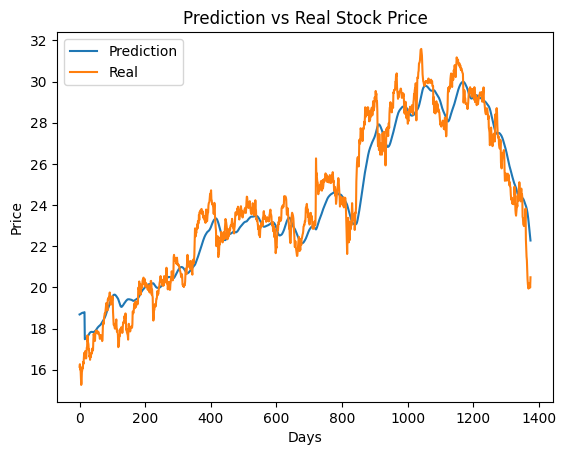

In [21]:
# Visualize the prediction
from matplotlib import pyplot as plt
plt.figure()
plt.plot(y_pred_org)
plt.plot(y_test_t_org)
plt.title('Prediction vs Real Stock Price')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.savefig('result-pred.png')
plt.show()

# Conclusion
When we evaluate the performance of a model, with metrics like Mean Squared Error (MSE) and R-squared (R2).

- Mean Squared Error (MSE): This measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit of the model to the data.

- R-squared (R2): This is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, where 1 indicates that the model perfectly predicts the target variable, and 0 indicates that the model does not predict the target variable at all.

In our case, the Bidirectional LSTM model has a lower MSE (0.00026371952580221767 vs 0.000367582129400338) and a higher R2 score (0.9604864142829238 vs 0.9460689353392759) compared to the LSTM model. This means that the Bidirectional LSTM model fits the data better and makes more accurate predictions.

Bidirectional LSTMs train two LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem, which might be the reason for the improved performance in out case.

So, in conclusion, the Bidirectional LSTM model has indeed improved out performance and predicted the stock price more accurately compared to the LSTM model.

# References:
[Submitted on 10 Oct 2020 (v1), last revised 20 Oct 2020 (this version, v3)]
Asset Price Forecasting using Recurrent Neural Networks.
https://arxiv.org/abs/2010.06417 - Hamed Vaheb